<a href="https://colab.research.google.com/github/leemutai/Intro_to_datascience/blob/main/ClusteringInTSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


In [7]:
from google.colab import files
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


In [8]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/IRIS.csv')

In [9]:

import numpy as np
import pandas as pd

np.random.seed(0)

data = np.random.rand(100, 5)

dataset = pd.DataFrame(data, columns=[f'feature_{i}' for i in range(1, 6)])


In [10]:
print(dataset.head())

   feature_1  feature_2  feature_3  feature_4  feature_5
0   0.548814   0.715189   0.602763   0.544883   0.423655
1   0.645894   0.437587   0.891773   0.963663   0.383442
2   0.791725   0.528895   0.568045   0.925597   0.071036
3   0.087129   0.020218   0.832620   0.778157   0.870012
4   0.978618   0.799159   0.461479   0.780529   0.118274


In [11]:
features = dataset

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(features)

In [13]:
tsne = TSNE(n_components=2, random_state=0)
tsne_data = tsne.fit_transform(scaled_data)


In [14]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(tsne_data)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


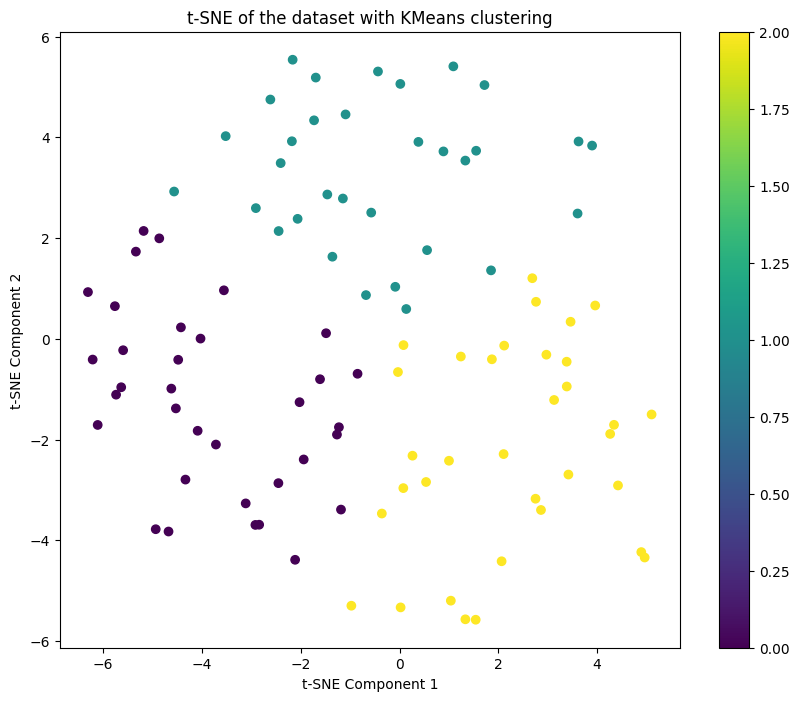

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of the dataset with KMeans clustering')
plt.colorbar()
plt.show()

In [16]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)

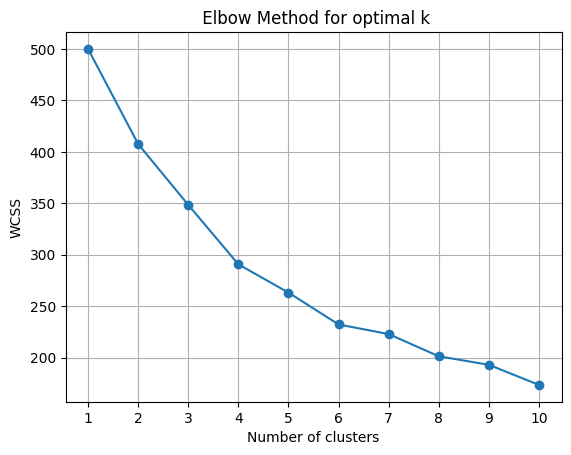

In [17]:
plt.plot(range(1,11),wcss,marker='o',linestyle='-')
plt.title(' Elbow Method for optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()